In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statystyka - Zestaw 1
### Autor: Konrad Ulman

## Problem A1

### Implementacja generatora liczb losowych z rozkładu normalnego  $ N(\mu, \sigma^2)$ metodą polarną

$ \mu = 0 $ - wartość oczekiwana, 

$ \sigma^2 = 1 $ - wariancja 


    


In [2]:
N = 1000000
bins = 1000

In [3]:
def polar(n = 1):
    """
    A1 - generator liczb losowych metoda polarna
    """
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)

    r = np.sqrt(-2*np.log(u1))
    x = np.cos(2*np.pi*u2)
    y = np.sin(2*np.pi*u2)
    z1 = r*x
    z2 = r*y
    
    return z1, z2

### Histogram i porównanie ze wzorem analitycznym

\begin{equation}
  f(y) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \dfrac{(y - \mu)^2}{2\sigma^2}}
\end{equation}

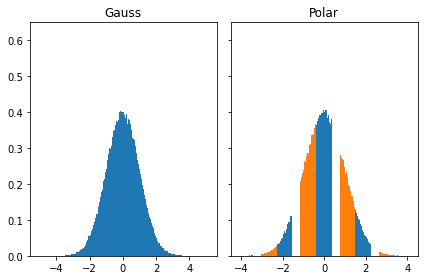

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')

axs[1].hist(polar(N), density=True, bins=bins)
axs[1].title.set_text('Polar')

plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

## Problem A2

### Implementacja generatora liczb losowych z rozkładu Cauchy'ego  $ C(y_0, \gamma)$, metodą odwróconej dystrybuanty

\begin{equation}
  f(y) = \dfrac{1}{ \pi \gamma [ 1 + ( \dfrac{y - y_0}{\gamma} )^2 ]}, y \in (-\infty, \infty)
\end{equation}


In [5]:
def cauchy(n, y = 0, scale = 1):
    return  ( (1 / np.pi) * ( scale / (  ( ( (np.random.rand(n)) - y )**2 ) + ( scale**2 ) ) ) ) 

### Histogram i porównanie ze wzorem analitycznym dla różnych $ y_0, \gamma $

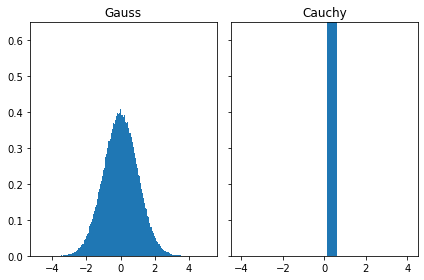

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')


s = cauchy(N, 0, 0.5)
axs[1].hist(s[(s>-4.5) & (s<4.5)] , density=True, bins=bins)
axs[1].title.set_text('Cauchy')

plt.plot()
plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

## Problem B

### Ruina gracza dla 2 graczy A, B

### Kapitały początkowe A,B:
$ a = 50; b = 50 $

In [7]:
def gamblers_ruin(number_of_games, a_balance, b_balance, prob ):
    wins = [False] * number_of_games
    
    for i in range(number_of_games):
        p1b = a_balance
        p2b = b_balance

        # Play until p1 or p2 is getting ruined
        while p1b > 0 and p2b > 0:
            p1_win = np.random.uniform(0, 1) < prob

            p1b = p1b + 1 if p1_win else p1b - 1

            p2b = p2b - 1 if p1_win else p2b + 1

        # Set to True, if p1 still not ruined        
        wins[i] = p1b > 0
        
    return sum(wins)

In [8]:
def print_stats(number_of_games, a_wins):
    print("Liczba rozgrywek wygranych przez A: ", a_wins)
    print("Liczba rozgrywek wygranych przez B: ", number_of_games - a_wins)
    print("Prawdopodobieństwo wygrania przez A: ", prob)
    print("Ułamek rozgrywek wygranych przez A: ", a_wins/number_of_games)
    print("Ułamek rozgrywek wygranych przez B: ", 1 - a_wins/number_of_games)

In [9]:
number_of_games = 1000

prob = 0.5
a_wins = gamblers_ruin(number_of_games, 50, 50, prob)

print_stats(number_of_games, a_wins)

Liczba rozgrywek wygranych przez A:  507
Liczba rozgrywek wygranych przez B:  493
Prawdopodobieństwo wygrania przez A: 0.5
Ułamek rozgrywek wygranych przez A:  0.507
Ułamek rozgrywek wygranych przez B:  0.493


## Problem C

### Ruina gracza dla 2 graczy A, B

$ a + b = 100 $